In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [4]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats = os.path.join(train_dir, 'cats')
train_dogs = os.path.join(train_dir, 'dogs')
validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))
num_cats_val = len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [5]:
BATCH_SIZE = 32
IMG_SHAPE = 150 # square image

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


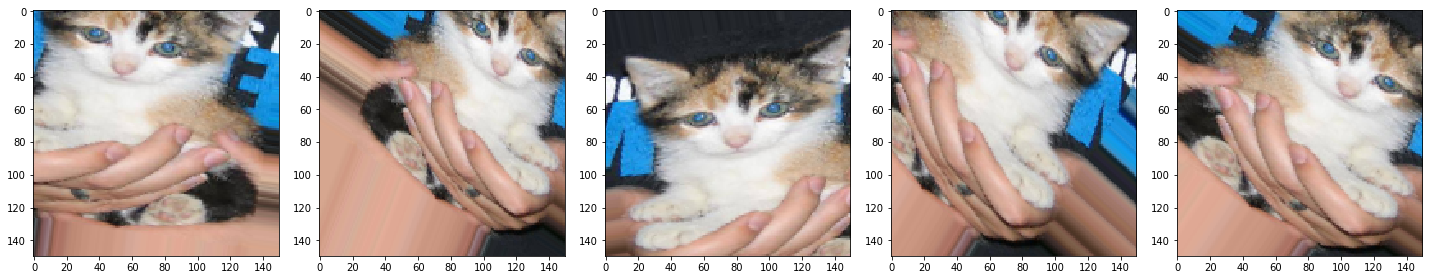

In [6]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_image_generator = ImageDataGenerator(
    rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory='train_data_gen',
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)


In [7]:
# model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), # 1/2 of neurons will be turned off randomly
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') #[0, 1] or [1, 0]
    
    ])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [8]:
EPOCHS = 15

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train // float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val // float(BATCH_SIZE)))
    )



Epoch 1/15
63/63 [==============================] - 215s 3s/step - loss: 0.6984 - acc: 0.4935 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/15
63/63 [==============================] - 218s 3s/step - loss: 0.6940 - acc: 0.5095 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 3/15
63/63 [==============================] - 216s 3s/step - loss: 0.6909 - acc: 0.5220 - val_loss: 0.6921 - val_acc: 0.5040
Epoch 4/15
63/63 [==============================] - 212s 3s/step - loss: 0.6919 - acc: 0.5275 - val_loss: 0.6866 - val_acc: 0.5880
Epoch 5/15
63/63 [==============================] - 215s 3s/step - loss: 0.6814 - acc: 0.5745 - val_loss: 0.6802 - val_acc: 0.5610
Epoch 6/15
63/63 [==============================] - 217s 3s/step - loss: 0.6674 - acc: 0.5945 - val_loss: 0.6371 - val_acc: 0.6380
Epoch 7/15
63/63 [==============================] - 218s 3s/step - loss: 0.6636 - acc: 0.5875 - val_loss: 0.6475 - val_acc: 0.6410
Epoch 8/15
63/63 [==============================] - 214s 3s/step - loss: 0.6411 - a

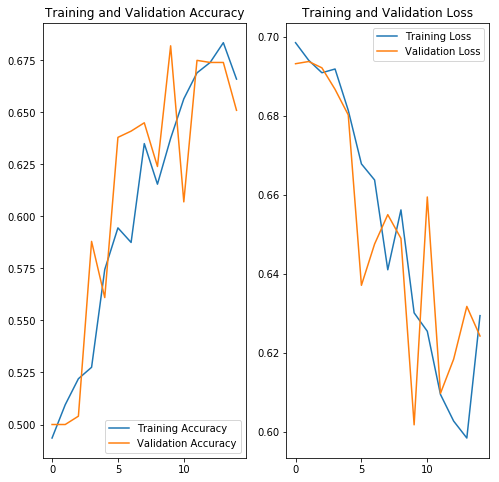

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()